In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV
from scipy import stats

# Estrarre $a_i$

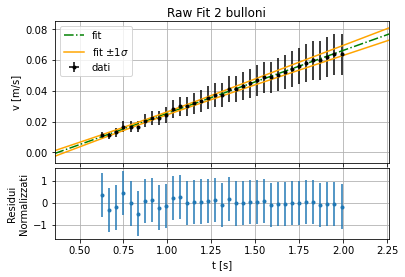

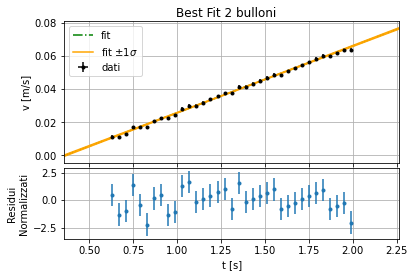

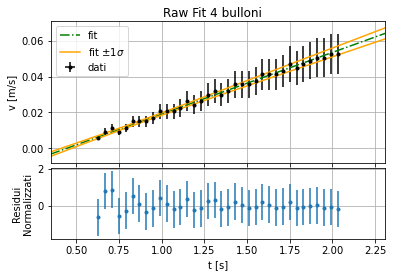

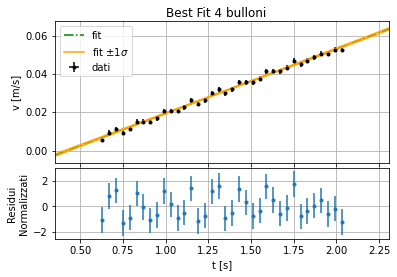

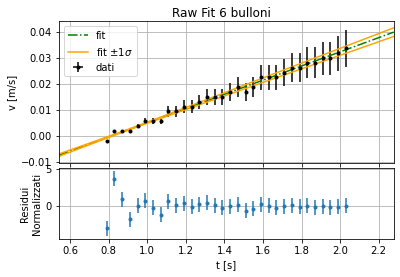

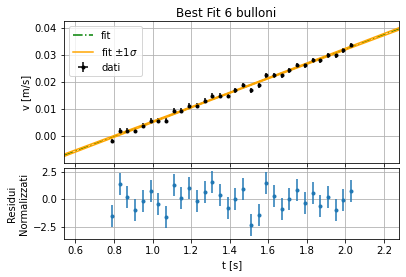

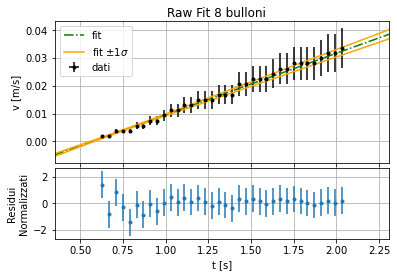

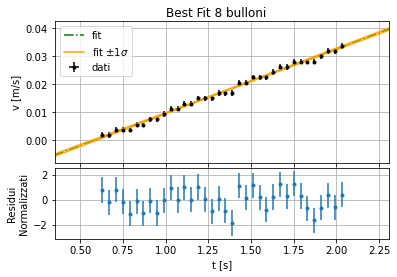

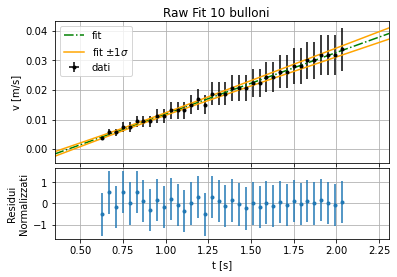

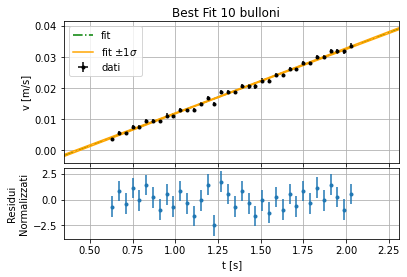

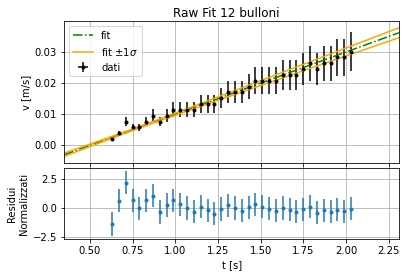

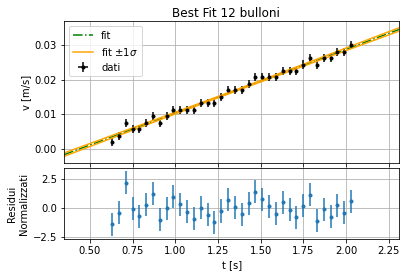

In [44]:
#setup grafici
fig1 = plt.figure(1)
fig2 = plt.figure(2)
ls = ['-','--','-.',':','-','--']

#setup analisi
limits = np.array([[30,30,38,30,30,30], #minimi
                   [100,102,102,102,102,102]]) #massimi
a = np.arange(6.0)
chi2_raw = np.arange(6.0)
chi2_best = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(10**-7)
sigma_t = 0.3*(10**-2)

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    n = x.size/2 # numero di punti sperimentali per il fit, n è float
    v = np.arange(n)
    sigma_v = np.arange(n)
    tau = np.arange(n)
    sigma_tau = np.arange(n)
    for j in range(int(n)):
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5    
        
    m0 = (v[int(n-1)]-v[0])/(tau[int(n-1)]-tau[0])
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, plot=True, verbose=False, res = True, save = True,
                                                        title='Raw Fit '+str((i+1)*2)+' bulloni', xlabel='t [s]', ylabel='v [m/s]', name='fig5b/rawFit'+str(i)+'.pdf', )
    chi2_raw[i] = np.sum(((v-(a[i]*tau+c))/sigma_v)**2)
    
    sigma_v_new_scalar = np.sqrt(np.sum((v-(a[i]*tau+c))**2)/(n-2))
    sigma_v_new = np.full(int(n), sigma_v_new_scalar)
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v_new, plot=True, verbose = False, save = True, res=True,
                                                        title='Best Fit '+str((i+1)*2)+' bulloni', xlabel = 't [s]', ylabel='v [m/s]', name='fig5b/bestFit'+str(i)+'.pdf')
    chi2_best[i] = np.sum(((v-(a[i]*tau+c))/sigma_v_new)**2)
    
    
    # Plottare posizioni e velocità
    plt.figure(fig1.number)
    plt.plot(t,x, label = str((i+1)*2)+' bulloni', ls = ls[i])
    plt.legend()
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(tau,v, label = str((i+1)*2)+' bulloni', ls =ls[i])
    plt.legend()
    plt.grid() 
    
plt.figure(1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posizioni misurate')

plt.figure(2)
plt.xlabel('t [s]')
plt.ylabel('v [m]')
plt.title('Velocità calcolate')


fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')
plt.close(1)
plt.close(2)

In [63]:
matrix1 = np.matrix([a, sigma_a, chi2_raw, chi2_best]) 
result1 = pd.DataFrame(data=matrix1, columns=[2,4,6,8,10,12], index=['a [m/s^2]','$\sigma_a$ [m/s^2]', '$\chi^2$ raw', '$\chi^2$ best'])
result1

,2,4,6,8,10,12
a [m/s^2],0.040270,0.033639,0.027012,0.023027,0.020819,0.018454
$\sigma_a$ [m/s^2],0.000381,0.000508,0.000439,0.000382,0.000277,0.000464
$\chi^2$ raw,1.025878,3.579777,30.178335,7.908536,2.177498,11.132509
$\chi^2$ best,30.985667,31.716171,29.369463,23.576189,33.800986,22.575131


Text(0.5, 0.98, 'Risultati del fit')

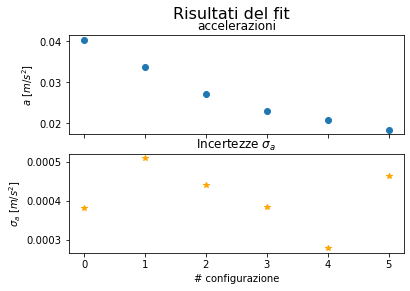

In [13]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')

fig3.suptitle('Risultati del fit', fontsize=16)

# Propagazione delle incertezze

In [ ]:
import sympy as sp
v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2 = sp.symbols('v, x2,x1, t1,t2,sigma_v,sigma_x1,sigma_x2, sigma_t1, sigma_t2')
v = (x2-x1)/(t2-t1)
sigma_v = quad(sp.diff(v,x2)*sigma_x2,
               sp.diff(v,x1)*sigma_x1,
               sp.diff(v,t2)*sigma_t2,
               sp.diff(v,t1)*sigma_t1)
sigma_v